In [1]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, BasicAer, transpile
from math import pi

In [2]:
def qft_gate(nbdigits):
    qr = QuantumRegister(nbdigits, 'qr')
    circuit = QuantumCircuit(qr)
    for i in range(nbdigits):
        circuit.h(qr[i])
        for j in range(i+1, nbdigits):
            circuit.cp(2*pi/2**(j-i+1), j, i)
    for i in range(nbdigits // 2):
        circuit.swap(i, nbdigits-i-1)
    return circuit.to_gate()

In [3]:
nbdigits = 2

In [4]:
circuit1 = QuantumCircuit(nbdigits, nbdigits)
circuit1.initialize([0, 0, 0, 1])
circuit1.append(qft_gate(nbdigits), list(range(nbdigits)))
circuit1.measure_all()
circuit1.draw()

┌──────────────────────┐┌─────────────┐ ░ ┌─┐   
   q_0: ┤0                     ├┤0            ├─░─┤M├───
        │  Initialize(0,0,0,1) ││  circuit-79 │ ░ └╥┘┌─┐
   q_1: ┤1                     ├┤1            ├─░──╫─┤M├
        └──────────────────────┘└─────────────┘ ░  ║ └╥┘
   c: 2/═══════════════════════════════════════════╬══╬═
                                                   ║  ║ 
meas: 2/═══════════════════════════════════════════╩══╩═
                                                   0  1

In [5]:
circuit1.decompose().draw()

┌─────────────────────────────┐┌───┐                  ░ ┌─┐   
   q_0: ─|0>─┤0                            ├┤ H ├─■─────────────X──░─┤M├───
             │  State Preparation(0,0,0,1) │└───┘ │P(π/2) ┌───┐ │  ░ └╥┘┌─┐
   q_1: ─|0>─┤1                            ├──────■───────┤ H ├─X──░──╫─┤M├
             └─────────────────────────────┘              └───┘    ░  ║ └╥┘
   c: 2/══════════════════════════════════════════════════════════════╬══╬═
                                                                      ║  ║ 
meas: 2/══════════════════════════════════════════════════════════════╩══╩═
                                                                      0  1

In [6]:
backend = Aer.get_backend('aer_simulator')
tqc = transpile(circuit1, backend)
job = backend.run(tqc, shots=1000)
result = job.result()
counts = result.get_counts()
print(counts)

{'11 00': 234, '01 00': 265, '00 00': 255, '10 00': 246}


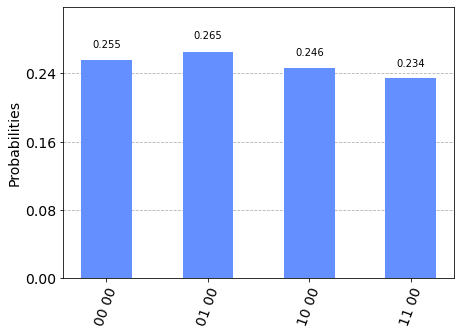

In [7]:
from qiskit.visualization import plot_histogram

plot_histogram(counts)

In [8]:
circuit2 = QuantumCircuit(nbdigits)
circuit2.initialize([0, 0, 0, 1])
circuit2.append(qft_gate(nbdigits), list(range(nbdigits)))
circuit2.draw()

┌──────────────────────┐┌──────────────┐
q_0: ┤0                     ├┤0             ├
     │  Initialize(0,0,0,1) ││  circuit-106 │
q_1: ┤1                     ├┤1             ├
     └──────────────────────┘└──────────────┘

In [9]:
backend = BasicAer.get_backend('statevector_simulator')
tqc2 = transpile(circuit2, backend)
job = backend.run(tqc2)
result = job.result()
statevector = result.get_statevector(circuit2)
statevector

array([ 5.00000000e-01-6.123234e-17j, -5.00000000e-01+6.123234e-17j,
       -1.48373104e-16-5.000000e-01j,  2.09605444e-16+5.000000e-01j])